# Model Explainability
Since we have a mapping from features to 1 or more substructures, we can see which parts of a reaction influence a model.

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from rdkit.Chem.AllChem import MolFromSmiles
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import shap

IPythonConsole.molSize = (300, 300)

shap.initjs()

Let's load a model, the drfp fingerprints, as well as the mapping of a set of Buchwald-Hartwig reactions... 

In [2]:
X, y = pickle.load(open("buchwald_hartwig.pkl", "rb"))
mapping = pickle.load(open("buchwald_hartwig.map.pkl", "rb"))
model = pickle.load(open("buchwald_hartwig_model.pkl", "rb"))
print(len(X))
print(model)

3955
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=12,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=999999, n_jobs=8, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)


Now use shap to try and explain this XGBRegressor model. Let's only use a subset of the data to speed it up.

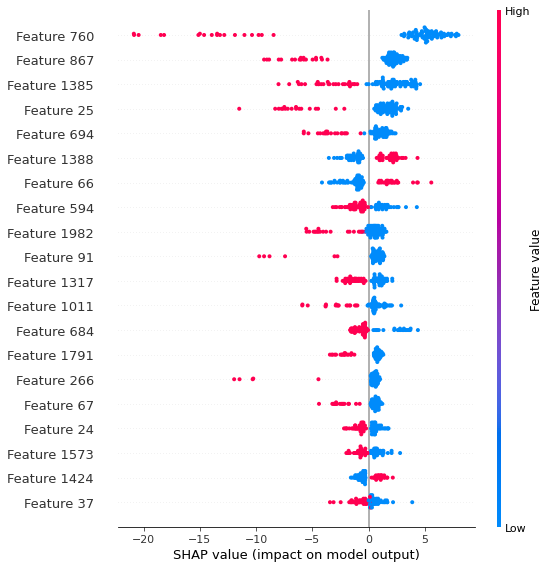

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X[:100])
shap.summary_plot(shap_values, X[:100])


We now have a list of top features and their influence on the model output. The presence of feature 66 seems to have a positive influence on the model output, let's the associated molecular n-gram(s).

[CH2]1[CH2][N]=[CH][N]([CH3])[CH2]1


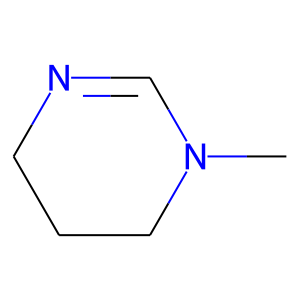

In [31]:
sub = list(mapping.get(66))[0]
print(sub)
MolFromSmiles(sub)

For Feature 760, it's the other way around, it's absence has a positive effect on the model output. 
(Since the substructure was part of an aromatic system, we have to cheat a little bit to display it with rdkit.)

[C]([CH2])([CH2])[Cl]


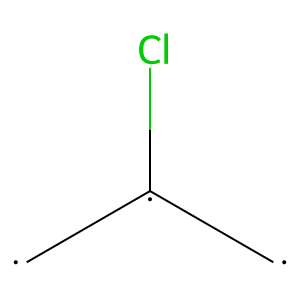

In [36]:
sub = list(mapping.get(760))[0].replace("c", "C")
print(sub)
MolFromSmiles(sub)

Now let's check out a single reaction and what features influence the prediction of its yield.

In [17]:
shap.force_plot(explainer.expected_value, shap_values[12,:])

In [22]:
shap.force_plot(explainer.expected_value, shap_values[42,:])

These are just a few examples how the mapping can be used to analyse and interpret the output of a model, in this case a gradient boosting based one.